In many engineering problems, we need to simultaneously optimize more than one objective function.

Some examples:

Minimize the costs and Emissions in power plants
Maximize the reliability while minimizing the costs
Minimizing the investment while maximizing the satisfaction
There are several approaches to address these types of problems such as:

* [weighted sum approach](https://en.wikipedia.org/wiki/Weighted_sum_model#:~:text=In%20decision%20theory%2C%20the%20weighted,of%20a%20number%20of%20decision)

* [Epsilon constrained method](https://mae.ufl.edu/nkim/eas6939/multiobjMATLAB.pdf)

The problem with weighted sum approach is that it is applicable when the objective functions are of the same dimensions (costs, weight, time) and even if they re of similar dimensions if the magnitude of them are not very similar then weighted sum is not very efficient. Additionally, if the preference of the decision maker is changed, then the problem should be resolved with a new set of weighting factors.

Alternatively, the epsilon constraint will provide the decision maker with a set of Pareto optimal solutions were none of the solutions would dominate the other ones. It provides the Pareto optimal solutions.

For example, consider this simple two objective problem

$$
max: {OF_1, OF_2}
$$

$$
OF_1 =c x_1 +d  x_2^2
$$

$$
OF_2=a x_1^2+b  x_2
$$


$$
Sto: OF_2 \leq \epsilon\\
x_1, x_2 \ge 2
$$








This problem is solved using epsilon constrained.

Pyomo can be used to formulate the epsilon constraint approach , the code is provide here.

Initially, you need to import the required packages (they should be already installed on your machine)


In [37]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

$$
OF_1 = a x_1 + b x_2^2\\
a=2\\
b = - 0.5
$$


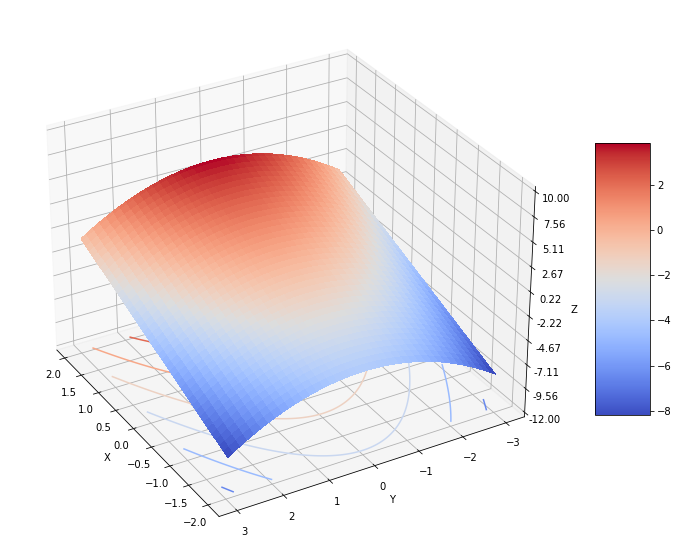

In [179]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
a = 2
b = -0.5
OF1 = a*X + b*Y**2
#R = np.sqrt(X**2 + Y**2)
Z = OF1

# Plot the surface.
surf = ax.plot_surface(X,
                       Y,
                       Z,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

# Customize the z axis.
ax.set_zlim(-12, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

cset = ax.contour(X, Y, Z, zdir='z', offset=-12, cmap=cm.coolwarm)

ax.view_init(30, 150)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


$$
OF_2 = c x_1^2 + d x_2\\
c = -1.2\\
d = 1.5
$$



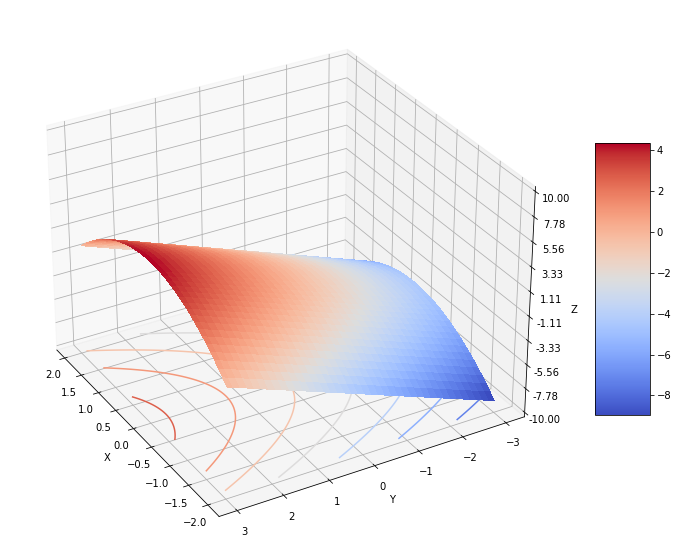

In [180]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
c = -1.2
d = 1.5
OF1 = c*X**2 + d*Y
#R = np.sqrt(X**2 + Y**2)
Z = OF1

# Plot the surface.
surf = ax.plot_surface(X,
                       Y,
                       Z,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

# Customize the z axis.
ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


cset = ax.contour(X, Y, Z, zdir='z', offset=-10, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(30, 150)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


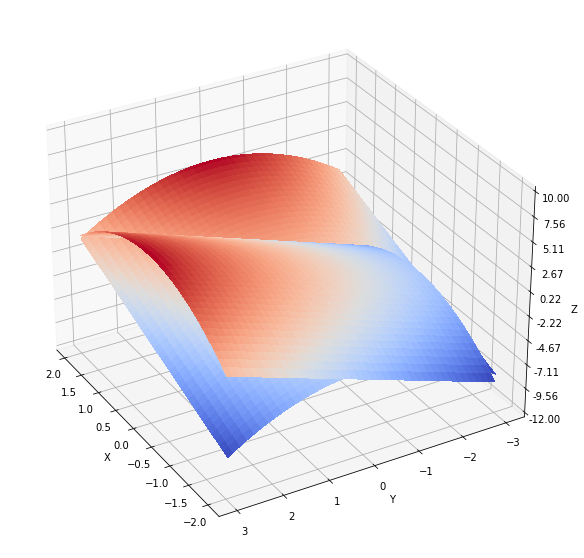

In [187]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
c = -1.2
d = 1.5
OF1 = c*X**2 + d*Y
Z1 = OF1
a = 2
b = -0.5
OF2 = a*X + b*Y**2
#R = np.sqrt(X**2 + Y**2)
Z2 = OF2

# Plot the surface.
surf = ax.plot_surface(X,
                       Y,
                       Z1,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

ax.plot_surface(X,
               Y,
               Z2,
               cmap=cm.coolwarm,
               linewidth=0,
               antialiased=False)

# Customize the z axis.
ax.set_zlim(-12, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.view_init(30, 150)

# Add a color bar which maps values to colors.

plt.show()

the next step is defining your model (objective functions and constraints)

In [104]:
model = ConcreteModel()

model.epsilon=Param(initialize=10000,mutable=True)

model.x1 = Var(bounds=(1,2), within=NonNegativeReals)
model.x2 = Var(bounds=(1,3), within=NonNegativeReals)

model.OF1 = Var(bounds=(-10000,10000), within=NonNegativeReals)
model.OF2 = Var(bounds=(-10000,10000), within=NonNegativeReals)

def const_1(model):
    a = -1.2
    b = 5
    return model.OF2 == a*model.x1**2 + b*model.x2 

model.eq1 = Constraint(rule= const_1)
#model.eq1= Constraint(expr= model.OF2==-1.2*model.x1**2+5*model.x2)


model.eq2 = Constraint(expr= model.OF2<=model.epsilon)

def const_2(model):
    c = 2
    d = -0.5
    return model.OF1 == c*model.x1 + d*model.x2**2

model.eq3 = Constraint(rule = const_2)
#model.eq3= Constraint(expr= model.OF1==2*model.x1-0.5*model.x2**2)


model.obj1 = Objective(expr=model.OF1, sense=maximize)
model.obj2 = Objective(expr=model.OF2, sense=maximize)

opt = SolverFactory('ipopt')

As you can see, we do have two objectives. It can't be solved by Pyomo unless you deactivate one of them (only one objective function can be optimizaed). so we have to deactivate one of them,

In [105]:
model.obj2.deactivate() 
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
maxOF1=value(model.obj1)
minOF2=value(model.obj2)

x1 =  2.0
x2 =  1.0
obj1 =  3.5
obj2 =  0.2


In [106]:
model.obj1.deactivate() 
model.obj2.activate() 
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
minOF1=value(model.obj1)
maxOF2=value(model.obj2)

x1 =  1.63
x2 =  2.55
obj1 =  0.0
obj2 =  9.58


In [189]:
Nsteps=21
OF1=[]
OF2=[]
X1 = []
X2 = []
print('  X1  ',' X2 ',' OF1 ',' OF2 ',' Epsilon ')
for counter in range(1,Nsteps+1):
    model.epsilon = minOF2+(maxOF2-minOF2)*(counter-1)/(Nsteps-1)
    results = opt.solve(model) # solves and updates instance
    print("%5.2f"% value(model.x1),"%5.2f"% value(model.x2),"%5.2f"% value(model.obj1),"%5.2f"% value(model.obj2), "%5.2f"% value(model.epsilon))
    OF1.append(value(model.obj1))
    OF2.append(value(model.obj2))
    X1.append(value(model.x1))
    X2.append(value(model.x2))
    

  X1    X2   OF1   OF2   Epsilon 
 2.00  1.00  3.50  0.20  0.20
 1.95  1.05  3.35  0.67  0.67
 1.90  1.10  3.20  1.14  1.14
 1.86  1.15  3.05  1.61  1.61
 1.81  1.20  2.90  2.08  2.08
 1.77  1.26  2.75  2.54  2.54
 1.74  1.33  2.59  3.01  3.01
 1.70  1.39  2.44  3.48  3.48
 1.67  1.46  2.28  3.95  3.95
 1.65  1.54  2.12  4.42  4.42
 1.63  1.61  1.95  4.89  4.89
 1.61  1.69  1.78  5.36  5.36
 1.59  1.77  1.61  5.83  5.83
 1.58  1.86  1.43  6.30  6.30
 1.56  1.94  1.25  6.77  6.77
 1.55  2.03  1.05  7.23  7.23
 1.54  2.11  0.86  7.70  7.70
 1.53  2.20  0.65  8.17  8.17
 1.53  2.29  0.44  8.64  8.64
 1.54  2.39  0.22  9.11  9.11
 1.63  2.55  0.00  9.58  9.58


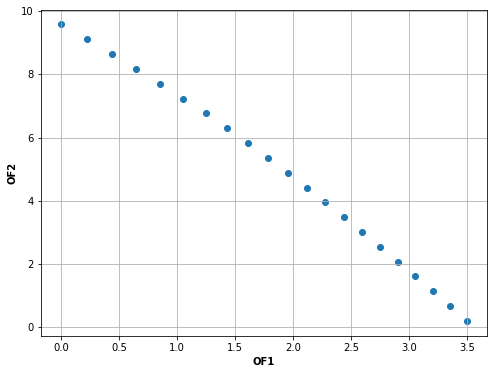

In [190]:
fig = plt.figure(figsize=(8,6))
plt.scatter(OF1,OF2)
plt.xlabel('OF1',fontweight='bold')
plt.ylabel('OF2',fontweight='bold')
plt.grid()
plt.show()

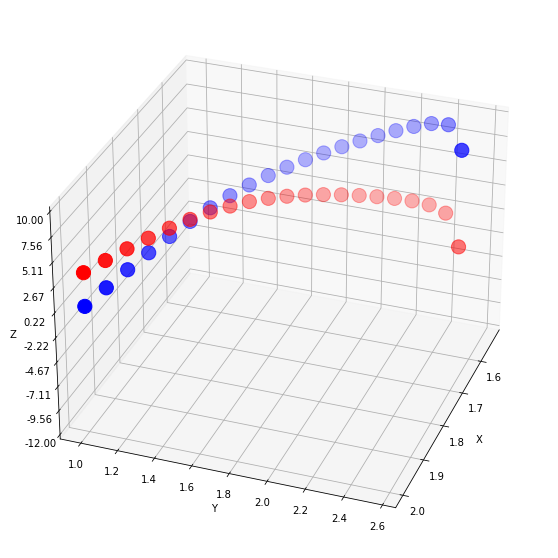

In [193]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X1, X2, OF1, c='red', s=200)
ax.scatter(X1, X2, OF2, c='blue', s=200)

# Customize the z axis.
ax.set_zlim(-12, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(30, 20)

# Add a color bar which maps values to colors.

plt.show()